# **Plant Disease Classification Using CNN**

**About Dataset**

We have used **plant_village** dataset for classification. The dataset consist of 4234 images of apple leaves. The dataset is divided into four classes namely Apple_scab, Frogeye_Spot, Cedar_apple_rust, and Healthy.

* Input image size: 64 * 64 * 3

* In the dataset :
    Training Set - 70%,
    Validation Set - 20%,
    Test Set - 10%

#**Importing Necessary libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Loading the training and testing data**


**Benefits of using ImageDataGenerator:**

* Requires lower memory usage - Because without using this class, we load all the images at once. But on using it, we are loading the images in batches which saves a lot of memory.

* Provides real-time data augmentation - It generates augmented images on the fly, while your model is still in the training stage.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255) # vertical_flip=True,
                                                   # horizontal_flip=True,
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/DL_Bootcamp/plant_village/train/',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/DL_Bootcamp/plant_village/val/',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/DL_Bootcamp/plant_village/test/',
        target_size=(64, 64),
        batch_size=1,
        class_mode='categorical')


FileNotFoundError: ignored

# **Visualization of few images**

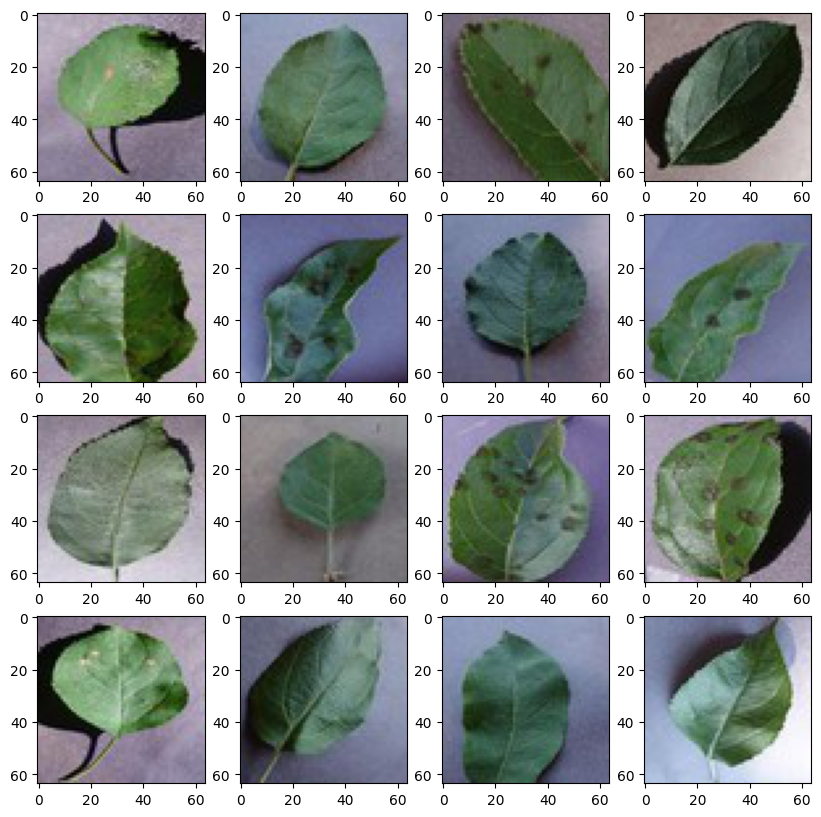

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(1, 17):
  plt.subplot(4, 4, i)
  img, label = test_generator.next()
  plt.imshow(img[0])
plt.show()

In [ ]:
img, label = test_generator.next()
img[0].shape

(64, 64, 3)


# **Model Definition**

* We are going to use 8 convolution layers with 3*3 filer and relu as an activation function
* Then max pooling layer with 2*2 filter is used
* After that we are going to use Flatten layer
* Then Dense layer is used with relu function
* In the output layer softmax function is used with 4 neurons as we have four class dataset.
* model.summary() is used to check the overall architecture of the model with number of learnable parameters
* Padding is Valid (no padding).
* Stride is 1


model.summary() gives information about output shape and number of parameters in each layer.

**Output shape** can be calculated using following equation:

$$ shape_w = \frac{w-f+2p}{s}+1$$

$$ shape_h = \frac{h-f+2p}{s}+1$$

**Parameter size** can be obtained using below equation:

$$ parameter = (filter_{size} * N^{channel}_{previous}*N^{filter}_{current}) + (N^{bias} * N^{filter}_{current}) $$




In [ ]:
# Create the model
model = models.Sequential()
# Add new layers
model.add(Conv2D(16, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu', input_shape=(64,64,3)))
model.add(Conv2D(32, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(64, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(64, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(128, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(256, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(256, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 128)       73856     
                                                        

#**Compiling and Training the Model**

In [ ]:
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])

# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/30
189/189 [==============================] - 797s 4s/step - loss: 1.2890 - acc: 0.4583 - val_loss: 1.2179 - val_acc: 0.5181
Epoch 2/30
189/189 [==============================] - 8s 42ms/step - loss: 1.2495 - acc: 0.4662 - val_loss: 1.2255 - val_acc: 0.5181
Epoch 3/30
189/189 [==============================] - 9s 47ms/step - loss: 1.1916 - acc: 0.4827 - val_loss: 1.0509 - val_acc: 0.5417
Epoch 4/30
189/189 [==============================] - 9s 46ms/step - loss: 0.8486 - acc: 0.6647 - val_loss: 0.5736 - val_acc: 0.7969
Epoch 5/30
189/189 [==============================] - 9s 50ms/step - loss: 0.5659 - acc: 0.7939 - val_loss: 0.7637 - val_acc: 0.7417
Epoch 6/30
189/189 [==============================] - 8s 43ms/step - loss: 0.4822 - acc: 0.8328 - val_loss: 0.5047 - val_acc: 0.8063
Epoch 7/30
189/189 [==============================] - 9s 47ms/step - loss: 0.4021 - acc: 0.8615 - val_loss: 0.3746 - val_acc: 0.8772
Epoch 8/30
189/189 [==============================] - 9s 50ms/step - 

# **Saving the model**

An H5 file is a data file saved in the Hierarchical Data Format (HDF). HDF5 lets you store huge amounts of numerical data, and easily manipulate that data from NumPy.

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/DL_Bootcamp/CONV_plant_disease.h5")
print("Saved model to drive")

Saved model to drive


# **Loading the model**

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL_Bootcamp/CONV_plant_disease.h5')

#**Visualization of Accuracy and Loss Curves**

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

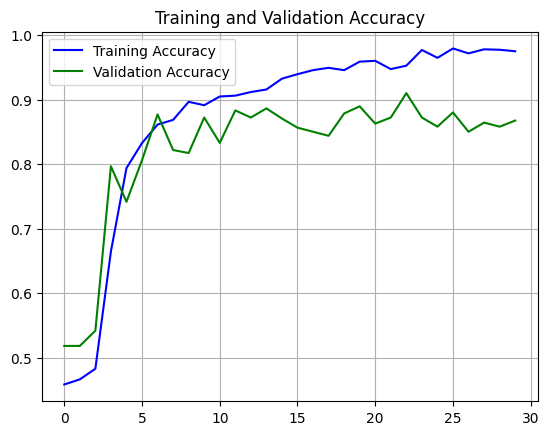

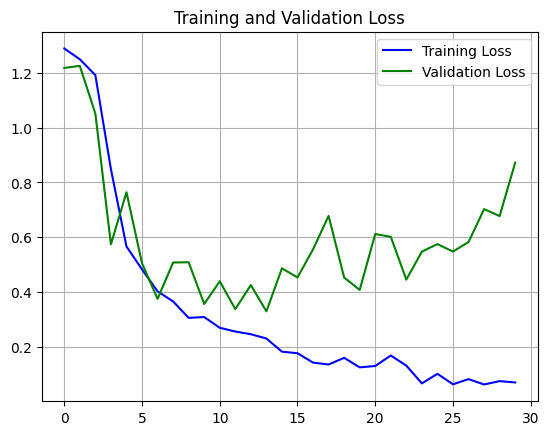

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

#**Prediction**

In [ ]:
# # Get the ground truth from generator
ground_truth = test_generator.classes
print('ground_truth',ground_truth)
# # Get the label to class mapping from the generator
label2index = test_generator.class_indices
print('label2index',label2index)
# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
print('predicted_classes',predicted_classes)
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


ground_truth [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3

<ipython-input-19-84d391e169bb>:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)


566/566 [==============================] - 2s 4ms/step
predicted_classes [2 3 3 2 3 0 1 3 3 3 1 0 3 1 1 1 2 3 0 1 3 2 0 3 3 3 3 1 0 3 3 3 0 3 1 3 3
 1 3 0 0 1 3 0 3 3 1 3 1 2 1 0 1 3 3 1 3 0 3 3 1 3 3 0 3 3 2 3 1 0 3 1 3 1
 3 0 1 3 3 1 3 0 1 2 3 3 2 3 3 3 2 3 1 3 1 2 3 1 3 0 2 3 1 0 2 3 3 3 3 2 3
 1 1 0 3 3 2 0 3 3 3 0 3 0 2 1 3 3 3 3 3 3 1 3 3 1 3 1 1 3 3 3 0 2 0 3 3 1
 1 3 2 0 3 3 3 3 0 1 3 2 2 1 3 3 0 1 3 3 0 3 3 1 0 0 3 1 1 1 0 0 3 3 0 3 3
 0 0 2 3 0 2 1 2 3 1 3 1 3 3 0 1 2 3 3 3 0 0 2 1 1 0 1 3 1 0 1 1 3 3 0 1 3
 3 3 3 3 0 3 0 1 3 3 0 3 1 0 0 1 1 3 3 1 3 0 1 3 3 3 0 3 3 0 3 0 1 3 2 0 0
 2 1 3 3 1 3 1 1 0 0 3 1 3 1 3 3 1 3 0 1 3 1 0 3 3 1 3 3 3 3 0 3 0 1 3 3 3
 1 3 0 2 1 0 1 2 0 2 1 3 3 2 0 3 3 1 0 1 3 0 3 1 3 3 1 3 1 1 0 3 3 3 3 3 0
 3 3 2 1 1 1 3 3 3 1 0 3 3 3 3 3 3 0 3 3 3 0 3 2 3 3 3 3 1 0 3 2 3 3 3 0 1
 1 3 1 3 1 0 1 3 1 0 3 2 1 0 3 2 1 3 1 3 1 0 3 3 3 2 3 3 2 3 0 2 1 3 0 2 3
 3 3 3 3 0 1 1 3 2 1 3 3 0 3 3 0 1 3 0 3 0 2 3 3 3 0 0 3 0 0 2 3 0 0 3 2 3
 1 1 3 3 3 3 3 1 2 1 3 1 0 

In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

33.215547703180206

#**Confusion Matrix**

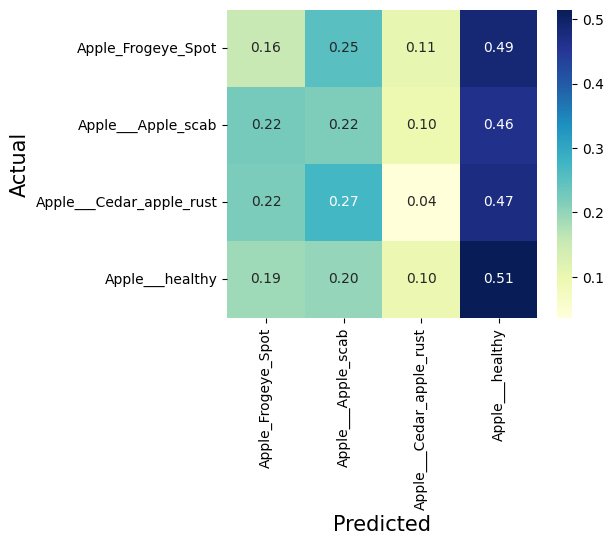

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

#**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

                          precision    recall  f1-score   support

      Apple_Frogeye_Spot       0.15      0.16      0.15       103
      Apple___Apple_scab       0.23      0.22      0.22       134
Apple___Cedar_apple_rust       0.04      0.04      0.04        55
         Apple___healthy       0.51      0.51      0.51       274

                accuracy                           0.33       566
               macro avg       0.23      0.23      0.23       566
            weighted avg       0.33      0.33      0.33       566



#**Finetuning Hyper-parameters**

In [ ]:
def create_model(learn_rate=0.01, momentum=0,opt):
    image_size = 64
    input_shape = (image_size, image_size, 3)

    # Create the model
    model = Sequential()
    # Add new layers
    model.add(Conv2D(16, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu', input_shape=(64,64,3)))
    model.add(Conv2D(32, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
    model.add(Conv2D(64, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
    model.add(Conv2D(64, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
    model.add(Conv2D(128, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), strides = 1, padding = 'valid', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    model.summary()

    # model = Model(input_shape, x)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.SGD(lr=learn_rate, momentum=momentum),
                  metrics=['accuracy'])

    return model


In [ ]:
learn_rate = [1e-9, 1e-3]
momentum = [0.6, 0.9]
optimizer = [sgd,]


def try_fit(learn_rate,momentum):
    history_page=[]
    for lr in learn_rate:
        for moment in momentum:
          for opt i optmizer:
            model = create_model(lr,moment,opt)
            history = model.fit(
                train_generator,
                epochs=1,
                validation_data=validation_generator)
            history_page.append(history)
    return history_page

history_page = try_fit(learn_rate,momentum)
history_page[0].history['accuracy']

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


190/190 [==============================] - 10s 51ms/step - loss: 1.2441 - accuracy: 0.4629 - val_loss: 1.1457 - val_accuracy: 0.5181


[0.2222222238779068]